<center>
    <img src="https://www.ucalgary.ca/themes/ucalgary/ucws_theme/images/UCalgary.svg" width='30%'>
</center>

----------


[comment]: <> (The following line is for the LECTURE title)
<p style="text-align:left;"><font size='6'><b> Deep Learning </b></font></p>

[comment]: <> (The following line is for the TOPIC of the week)
<p style="text-align:left;"><font size='4'><b> PyTorch and Gradient Descent </b></font></p>


----------

In this first notebook we introduce PyTorch and build a simple neural network (NN).

In [33]:
#PyTorch library is called Torch
import torch
import numpy as np

### What is PyTorch?

One of the many current ways of writting deep learning. The idea is to have objects (tensors) that **behave like numpy** arrays but can be computed in GPUs.

#### Tensors

Tensors are multidimensional arrays. We can build tensors trivially as follows.

In [2]:
# Creates a 2x3 tensor from a list
x = torch.tensor([[1,2,3],[4,5,6]])
print(x)

# Creates a 2x3 tensor filled with zeros
x = torch.zeros(2,3)
print(x)

# Creates a 2x3 tensor filled with random numbers
# from a uniform distribution between 0 and 1.
x = torch.rand(2,3)
print(x)

tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.7248, 0.4091, 0.1198],
        [0.9720, 0.5854, 0.6245]])


In [3]:
# Make a (5, 10, 3) Tensor of random numbers from a uniform distribution between 0 and 1
x_ = torch.rand(5, 10, 3)
print(x_.shape)

torch.Size([5, 10, 3])


We can compare this with numpy

In [4]:
y = np.array([[1,2,3],[4,5,6]])
print(y)

y = np.zeros(shape=(2,3))
print(y)

y = np.random.random((2,3))
print(y)

[[1 2 3]
 [4 5 6]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[0.90371821 0.87316562 0.5736349 ]
 [0.07724265 0.10085438 0.48747014]]


we can operate on tensors in the same way we do operations with numpy arrays

In [5]:
(x+1)*(x+4)**2

tensor([[38.5053, 27.3942, 19.0059],
        [48.7474, 33.3362, 34.7400]])

In [6]:
(y+1)*(y+4)**2

array([[45.7776692 , 44.48345623, 32.91750918],
       [17.90798236, 18.51307537, 29.95376368]])

But, we can't do mixed operations with torch tensors with numpy arrays. They must both be numpy or both be torch.

In [7]:
x + y

C:\Users\DLP\AppData\Local\Temp\ipykernel_10152\978381659.py:1: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  x + y


tensor([[1.6286, 1.2823, 0.6934],
        [1.0492, 0.6863, 1.1119]], dtype=torch.float64)

instead we can convert and then operate

In [8]:
y = torch.from_numpy(y)

But we still will get some problems, the reasons is that tensors in PyTorch are almost statically typed. Meaning that we must keep track of the data typed before operating between them. For example, if we try to run

In [9]:
x+y

tensor([[1.6286, 1.2823, 0.6934],
        [1.0492, 0.6863, 1.1119]], dtype=torch.float64)

we get a RunTimeError, the reason is

In [10]:
x.dtype

torch.float32

In [11]:
y.dtype

torch.float64

the tensors have different type. We can fix that by changing the type. There are many ways of doing that

In [12]:
x=x.type(torch.DoubleTensor)
#or
x = x.double()

In [13]:
x+y

tensor([[1.6286, 1.2823, 0.6934],
        [1.0492, 0.6863, 1.1119]], dtype=torch.float64)

In [14]:
#### Write code to create numpy arrays
# Make them into tensors
# And add them

new_x = np.array([[1,2,3]])
new_y = np.array([[4,5,6]])

ten_x = torch.from_numpy(new_x)
ten_y = torch.from_numpy(new_y)

ten_x + ten_y

tensor([[5, 7, 9]])

When a gpu is available. The method .cuda() will send the data to the gpu to be computed.

In [15]:
if torch.cuda.is_available():
    print(x.cuda()+y.cuda()) #Done in gpu

tensor([[1.6286, 1.2823, 0.6934],
        [1.0492, 0.6863, 1.1119]], device='cuda:0', dtype=torch.float64)



## Gradient descent

Gradient descent is the main process behind Neural Networks, the idea is simple we want to use the direction in which the function decreases the fastest in order to approach the minimum of the function.

From the programming point of view, we first need to create variables, these are part of the package autograd.

In [16]:
from torch.autograd import Variable

Let's create the variable $$z= x^2+y^2.$$ We want to know how the values of $x$ and $y$ change when $z$ changes.
When creating a Variable we initialize it by feeding a tensor of a certain shape. We initialize $x$ with the value 2, and $y$ with the value 3.

In [17]:
x=Variable(2*torch.ones(1),requires_grad=True)
y=Variable(3*torch.ones(1),requires_grad=True)
z= x**2+y**2

which gives $z$ the value of $$z = 2^2 + 3^2 =4+9 = 13.$$

In [18]:
print(z)

tensor([13.], grad_fn=<AddBackward0>)


Note that we have use the requires_grad option. This means that the variables will have a second value (gradient) which we can access via the attribute grad.

In [19]:
print(x.grad)

None


Now to the computation of the gradients. The method backward() when apply to a variable computes the derivative $dz/dx$ and $dz/dy$ and keeps the values on the grad attribute.

In [20]:
z.backward()

Note that the derivatives are

$$\frac{dz}{dx}=2x $$  and  $$\frac{dz}{dy}=2y$$

which, when we plug in the current values of $x=2$ and $y=3$ gives

$$\left.\frac{dz}{dx}\right|_{x=2}=2\cdot2=4 $$ and $$ \left.\frac{dz}{dy}\right|_{y=3}=2\cdot3=6$$

In [21]:
# Print the gradients of X and Y
print(x.grad, y.grad)

tensor([4.]) tensor([6.])


But note that the values of $x$ and $y$ haven't changed.

In [22]:
print(x,y)

tensor([2.], requires_grad=True) tensor([3.], requires_grad=True)


Let's graph this info

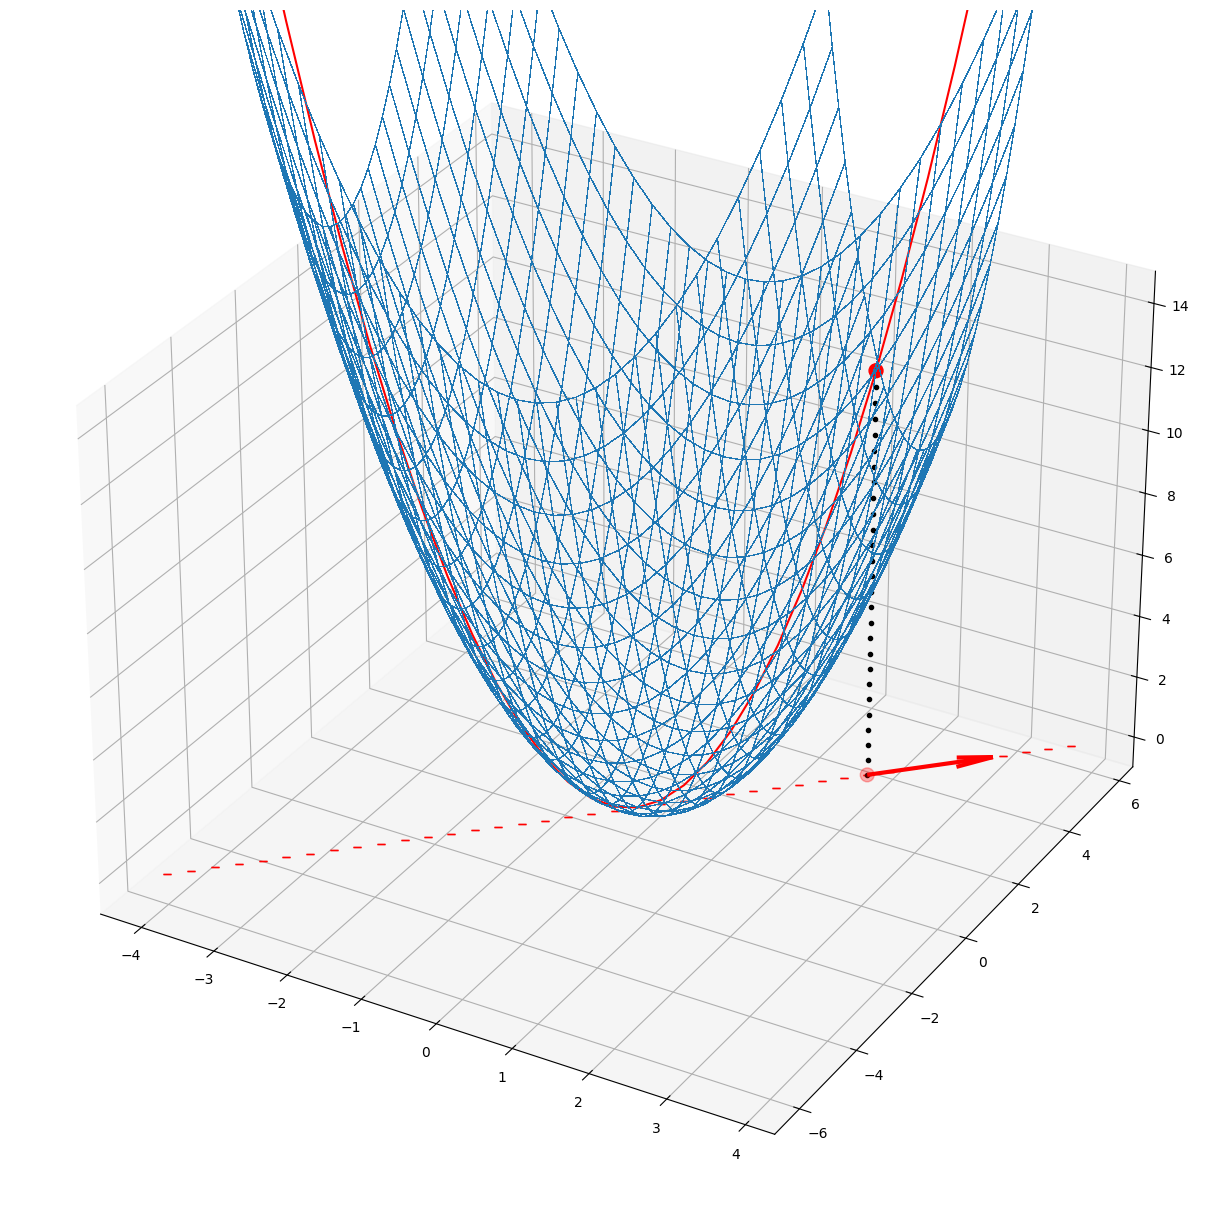

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure(figsize=(16,12))
# ax = fig.gca()
ax = Axes3D(fig)
fig.add_axes(ax)

# Make data.
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
t = np.arange(-2,2,0.1)
t2 = np.arange(0,1,0.1)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_wireframe(X, Y, Z,
                       linewidth=0.2, cmap=cm.coolwarm,antialiased=False)

# Customize the z axis.
ax.plot(2*t,3*t,13*t**2,color='r')
ax.plot(2*t,3*t,0*t**2,'_',color='r')
ax.plot(2*t,3*t,0*t**2,'_',color='r')
ax.plot([2 for a in range(26)], [3 for a in range(26)], [0.5*a for a in range(26)],".",color='black')
ax.set_zlim(-1, 15)
ax.scatter([2,2],[3,3],[0,13],s=100,color='r')
ax.quiver([2], [3], [0], [4], [6], [0], normalize=True, length=2, lw=3,color='r')

#Uncomment the following to rotate to your view
#ax.view_init(20, 60)
plt.show()

So meanwhile the gradient at any point gives the direction of highest increase, we have that the negative of the gradient gives the direction of the fastest decrease, so if we move in that direction we may get closer to the min.

In [24]:
step = 0.1
x.data = x.data - step*x.grad.data
y.data = y.data - step*y.grad.data
x.grad.data.zero_()
y.grad.data.zero_()

tensor([0.])

we get that the new values are

In [25]:
x,y

(tensor([1.6000], requires_grad=True), tensor([2.4000], requires_grad=True))

In [26]:
x.grad,y.grad

(tensor([0.]), tensor([0.]))

and their respective gradients have been erased, we can apply the same technique a couple times like this

In [27]:
for i in range(30):
    z=x**2+y**2
    z.backward()
    x.data = x.data - step*x.grad.data
    y.data = y.data - step*y.grad.data
    print(x.data.numpy()[0],",",y.data.numpy()[0])
    print(x.grad.data.numpy()[0],",",y.grad.data.numpy()[0])
    print(z.data)
    x.grad.data.zero_()
    y.grad.data.zero_()

1.28 , 1.9200001
3.2 , 4.8
tensor([8.3200])
1.0239999 , 1.536
2.56 , 3.8400002
tensor([5.3248])
0.8191999 , 1.2288
2.0479999 , 3.072
tensor([3.4079])
0.6553599 , 0.98304003
1.6383998 , 2.4576
tensor([2.1810])
0.52428794 , 0.786432
1.3107198 , 1.9660801
tensor([1.3959])
0.41943035 , 0.6291456
1.0485759 , 1.572864
tensor([0.8934])
0.3355443 , 0.5033165
0.8388607 , 1.2582912
tensor([0.5717])
0.26843542 , 0.40265322
0.6710886 , 1.006633
tensor([0.3659])
0.21474834 , 0.32212257
0.53687084 , 0.80530643
tensor([0.2342])
0.17179868 , 0.25769806
0.42949668 , 0.64424515
tensor([0.1499])
0.13743894 , 0.20615844
0.34359735 , 0.5153961
tensor([0.0959])
0.10995115 , 0.16492675
0.27487788 , 0.4123169
tensor([0.0614])
0.08796092 , 0.13194141
0.2199023 , 0.3298535
tensor([0.0393])
0.07036874 , 0.10555313
0.17592184 , 0.26388282
tensor([0.0251])
0.05629499 , 0.084442504
0.14073747 , 0.21110626
tensor([0.0161])
0.04503599 , 0.067554004
0.11258998 , 0.16888501
tensor([0.0103])
0.036028795 , 0.054043204
0.

In [28]:
x,y

(tensor([0.0020], requires_grad=True), tensor([0.0030], requires_grad=True))

** Exercises:**
- Graph the gradient descent. (The points that are been obtained and the gradients)
- Change the step size to 100 or to 0.0000001. What do you observe?`

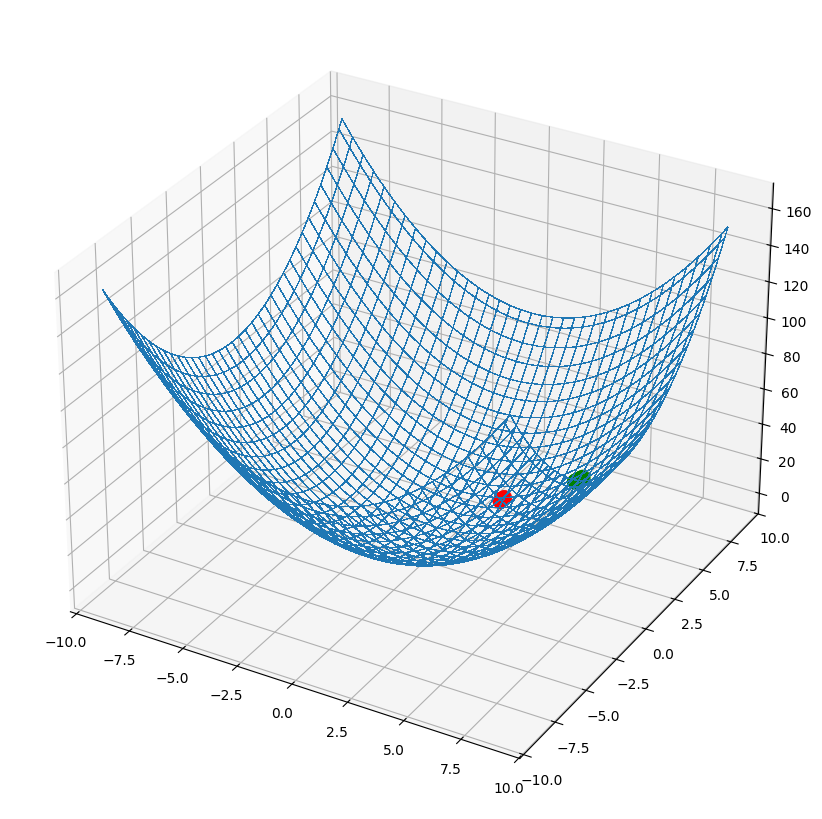

In [32]:
x = Variable(2*torch.ones(1),requires_grad=True)
y = Variable(3*torch.ones(1),requires_grad=True)
z = x**2+y**2

x_vals = []
y_vals = []
z_vals = []

x_grads = []
y_grads = []

step = 0.001

for i in range(30):
    z=x**2+y**2
    z.backward()
    x.data = x.data - step*x.grad.data
    y.data = y.data - step*y.grad.data

    x_vals.append(x.data.numpy()[0])
    y_vals.append(y.data.numpy()[0])
    z_vals.append(z.data.numpy()[0])

    x_grads.append(x.grad.data.numpy()[0])
    y_grads.append(y.grad.data.numpy()[0])

    x.grad.data.zero_()
    y.grad.data.zero_()#brainsotrming
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
fig.add_axes(ax)

# Make data.
X = np.arange(-9, 9, 0.25)
Y = np.arange(-9, 9, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_wireframe(X, Y, Z,
                       linewidth=0.2, cmap=cm.coolwarm,antialiased=False)

# Customize the z axis.
ax.scatter(x_vals, y_vals, z_vals,s=100,color='r')
ax.scatter(x_grads, y_grads, z_vals,s=100,color='g')
#Uncomment the following to rotate to your view
plt.show()

# Exercise 2

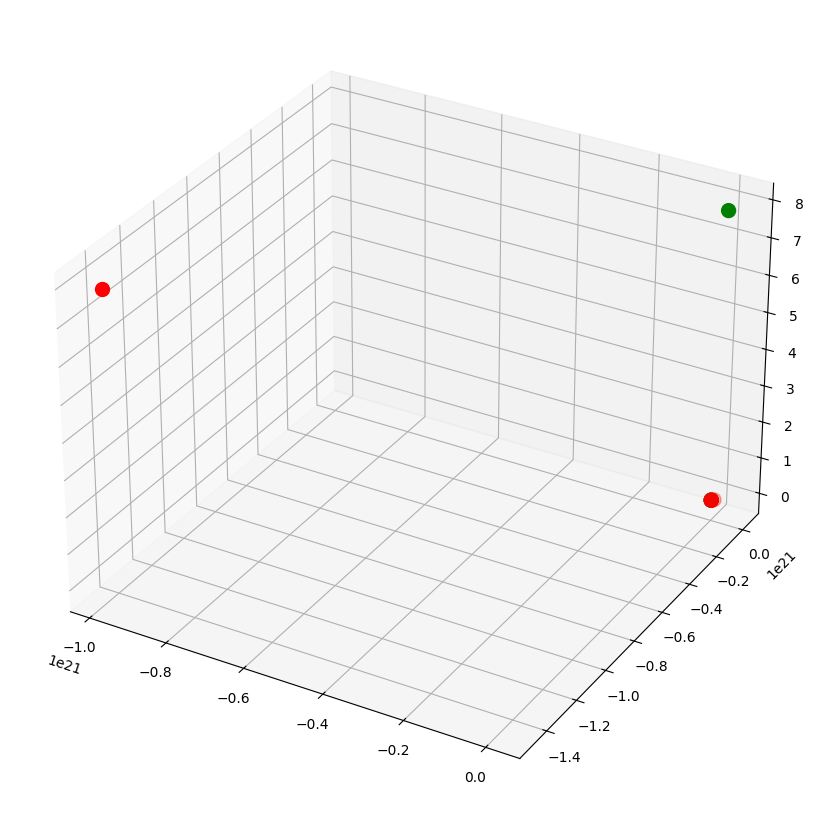

In [30]:
x = Variable(2*torch.ones(1),requires_grad=True)
y = Variable(3*torch.ones(1),requires_grad=True)
z = x**2+y**2

x_vals = []
y_vals = []
z_vals = []

x_grads = []
y_grads = []

step = 100
steo = 0.0000001
for i in range(30):
    z=x**2+y**2
    z.backward()
    x.data = x.data - step*x.grad.data
    y.data = y.data - step*y.grad.data

    x_vals.append(x.data.numpy()[0])
    y_vals.append(y.data.numpy()[0])
    z_vals.append(z.data.numpy()[0])

    x_grads.append(x.grad.data.numpy()[0])
    y_grads.append(y.grad.data.numpy()[0])

    x.grad.data.zero_()
    y.grad.data.zero_()#brainsotrming
fig = plt.figure(figsize=(12,8))
ax = Axes3D(fig)
fig.add_axes(ax)

# Make data.
X = np.arange(-9, 9, 0.25)
Y = np.arange(-9, 9, 0.25)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

# Plot the surface.
surf = ax.plot_wireframe(X, Y, Z,
                       linewidth=0.2, cmap=cm.coolwarm,antialiased=False)

# Customize the z axis.
ax.scatter(x_vals, y_vals, z_vals,s=100,color='r')
ax.scatter(x_grads, y_grads, z_vals,s=100,color='g')
#Uncomment the following to rotate to your view
plt.show()